In [1]:
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
import pandas as pd

df = pd.read_csv(path + "/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Dataset shape: (50000, 2)

--- RAW REVIEWS ---

Review 1 (sentiment=positive):

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ ...

Review 2 (sentiment=positive):

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing gui

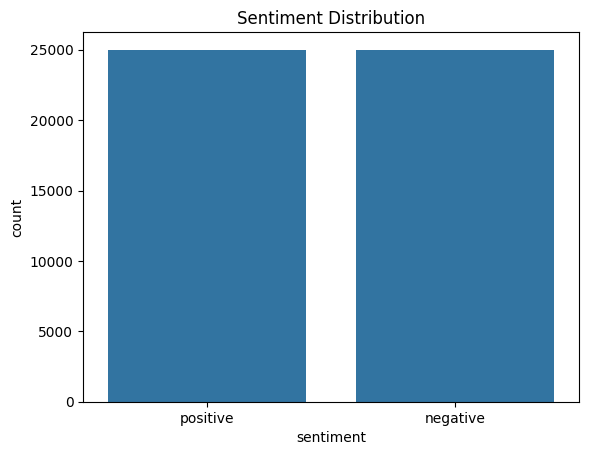

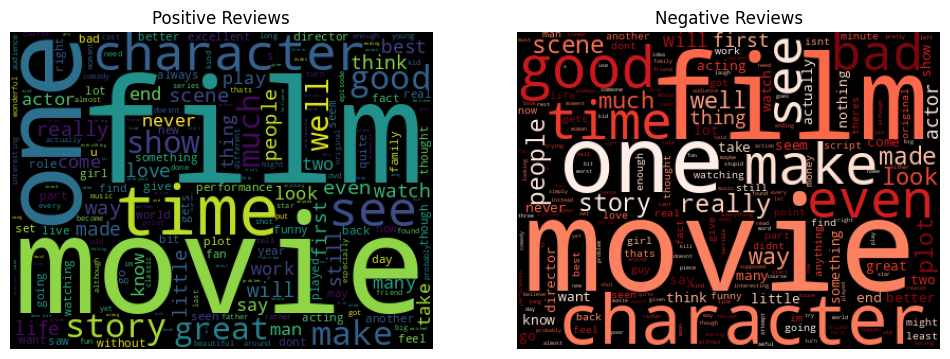

Training shape: (40000, 200)
Testing shape: (10000, 200)

=== Training SimpleRNN (64 units, 1 layer) ===
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4960 - loss: 0.7032 - val_accuracy: 0.5080 - val_loss: 0.6931
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6143 - loss: 0.6505 - val_accuracy: 0.5129 - val_loss: 0.7160
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6992 - loss: 0.4990 - val_accuracy: 0.5126 - val_loss: 0.8245
SimpleRNN (64 units, 1 layer) Test Accuracy: 0.5137 | Training Time: 29.74 sec

=== Training LSTM (64 units, 1 layer) ===
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5083 - loss: 0.6934 - val_accuracy: 0.5307 - val_loss: 0.6858
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5669 - loss: 0.6783 - val_accuracy: 0.5240 - val_loss: 0.7365
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6782 - loss: 0.6093 - val_accuracy: 0.6492 - val_loss: 0.6023
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6914 - loss: 0.5887 - val_accuracy: 0.7899 - val_loss

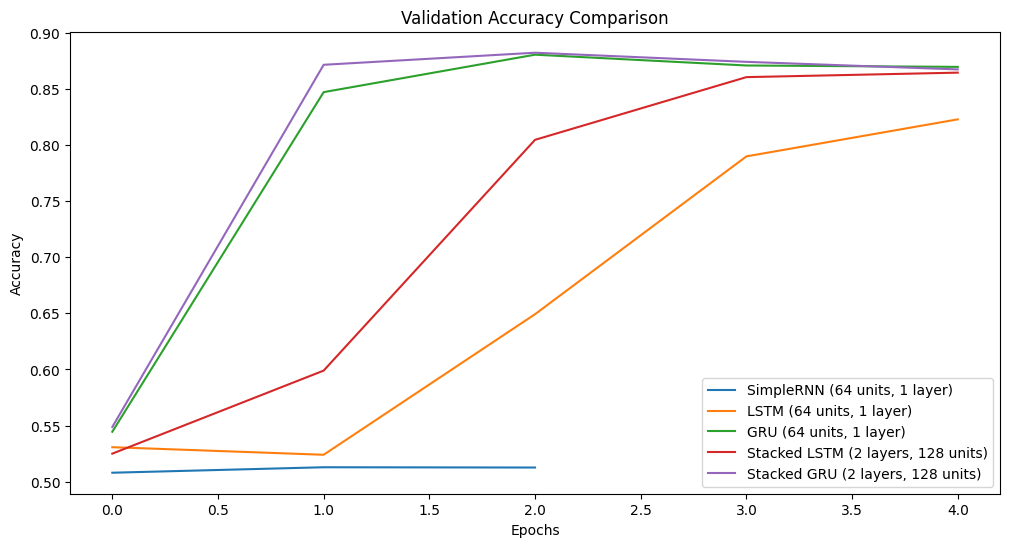

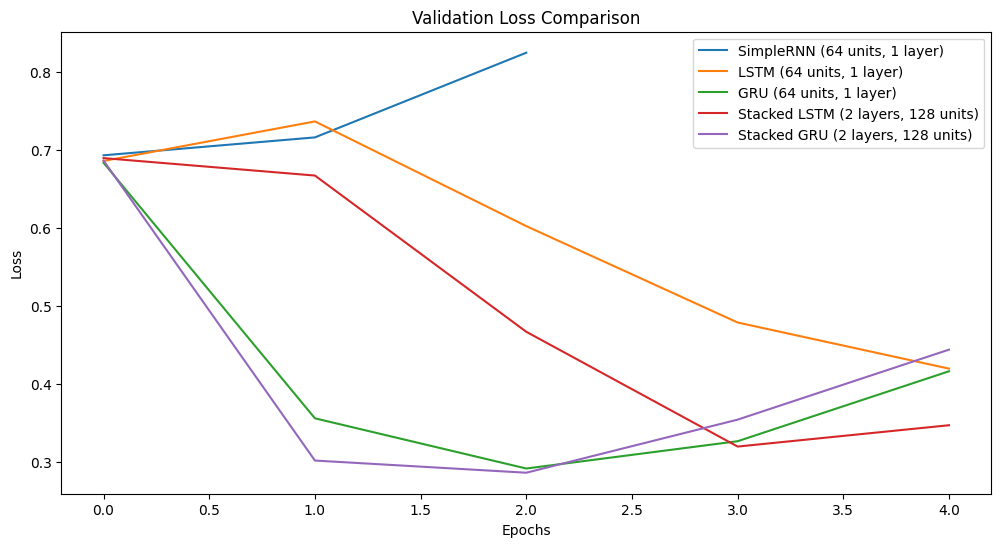

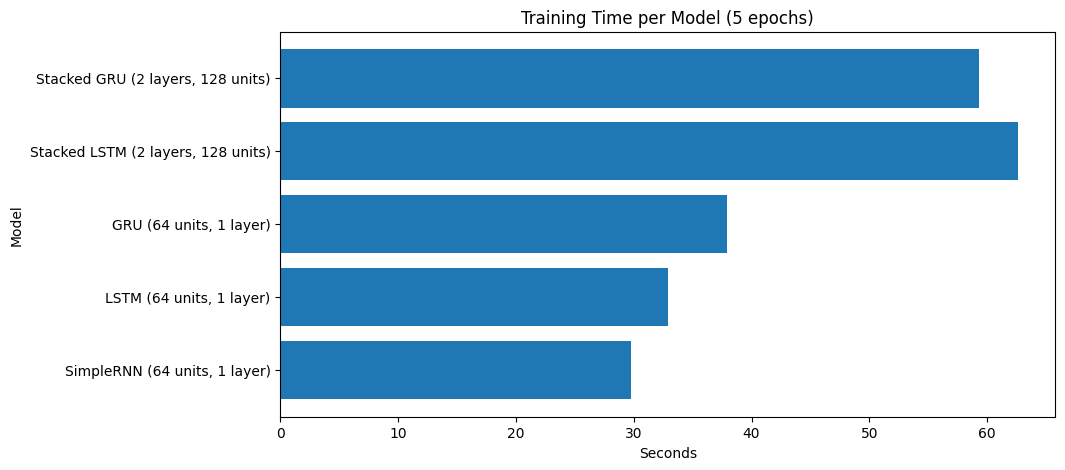


=== Summary Table ===
                                Model  Accuracy  Training Time (sec)
0       SimpleRNN (64 units, 1 layer)    0.5137            29.738508
1            LSTM (64 units, 1 layer)    0.8292            32.890433
2             GRU (64 units, 1 layer)    0.8821            37.878438
3  Stacked LSTM (2 layers, 128 units)    0.8693            62.653602
4   Stacked GRU (2 layers, 128 units)    0.8882            59.321187

Best Model: Stacked GRU (2 layers, 128 units)
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5062 - loss: 0.6937
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6551 - loss: 0.5759
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9255 - loss: 0.2017
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9669 - loss: 0.1031
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9868 - loss: 0.0488
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


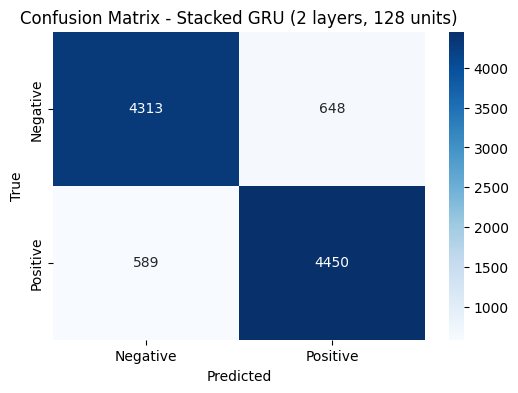


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87      4961
    Positive       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [5]:
# ========================================
# Sentiment Analysis with RNN, LSTM, GRU
# Extended Teaching Version + Summary Table + Loss Plots
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, time
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------
# Step 1: Load Dataset
# -------------------------
df = pd.read_csv(f"{path}/IMDB Dataset.csv")
print("Dataset shape:", df.shape)

# Show raw reviews
print("\n--- RAW REVIEWS ---")
for i in range(2):
    print(f"\nReview {i+1} (sentiment={df['sentiment'][i]}):\n")
    print(df['review'][i][:500], "...")

# -------------------------
# Step 2: Cleaning
# -------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)  # remove HTML
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)     # remove numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_review"] = df["review"].apply(clean_text)
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Show cleaned vs original
print("\n--- CLEANED REVIEWS ---")
for i in range(2):
    print(f"\nOriginal:\n{df['review'][i][:200]}...\n")
    print(f"Cleaned:\n{df['clean_review'][i][:200]}...\n")

# -------------------------
# Step 3: Data Exploration
# -------------------------
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# WordClouds
pos_text = " ".join(df[df["label"]==1]["clean_review"].values[:2000])
neg_text = " ".join(df[df["label"]==0]["clean_review"].values[:2000])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300).generate(pos_text))
plt.axis("off")
plt.title("Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300, colormap="Reds").generate(neg_text))
plt.axis("off")
plt.title("Negative Reviews")
plt.show()

# -------------------------
# Step 4: Tokenization
# -------------------------
vocab_size = 20000
maxlen = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_review"])

X = tokenizer.texts_to_sequences(df["clean_review"])
X = pad_sequences(X, maxlen=maxlen, padding="post", truncating="post")
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# -------------------------
# Step 5: Model Architectures
# -------------------------
embedding_dim = 128
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

def build_rnn_model(units=64, layers=1):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    for l in range(layers):
        model.add(SimpleRNN(units, return_sequences=(l < layers-1)))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_lstm_model(units=64, layers=1):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    for l in range(layers):
        model.add(LSTM(units, return_sequences=(l < layers-1)))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_gru_model(units=64, layers=1):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    for l in range(layers):
        model.add(GRU(units, return_sequences=(l < layers-1)))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# -------------------------
# Step 6: Train Models with Timing
# -------------------------
configs = [
    ("SimpleRNN (64 units, 1 layer)", build_rnn_model(64, 1)),
    ("LSTM (64 units, 1 layer)", build_lstm_model(64, 1)),
    ("GRU (64 units, 1 layer)", build_gru_model(64, 1)),
    ("Stacked LSTM (2 layers, 128 units)", build_lstm_model(128, 2)),
    ("Stacked GRU (2 layers, 128 units)", build_gru_model(128, 2)),
]

history = {}
results = {}
timings = {}

for name, model in configs:
    print(f"\n=== Training {name} ===")
    start = time.time()
    h = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=64,
        callbacks=[early_stop],
        verbose=1
    )
    end = time.time()
    elapsed = end - start

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f} | Training Time: {elapsed:.2f} sec")

    history[name] = h
    results[name] = acc
    timings[name] = elapsed

# -------------------------
# Step 7: Compare Results
# -------------------------
# Accuracy plot
plt.figure(figsize=(12,6))
for name, h in history.items():
    plt.plot(h.history["val_accuracy"], label=name)
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(12,6))
for name, h in history.items():
    plt.plot(h.history["val_loss"], label=name)
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Runtime comparison
plt.figure(figsize=(10,5))
plt.barh(list(timings.keys()), list(timings.values()))
plt.title("Training Time per Model (5 epochs)")
plt.xlabel("Seconds")
plt.ylabel("Model")
plt.show()

# Summary table
summary_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": list(results.values()),
    "Training Time (sec)": list(timings.values())
})
print("\n=== Summary Table ===")
print(summary_df)

# -------------------------
# Step 8: Confusion Matrix
# -------------------------
best_model_name = summary_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")

# Retrain best model fully
if "RNN" in best_model_name:
    best_model = build_rnn_model(64, 1)
elif "LSTM" in best_model_name and "Stacked" not in best_model_name:
    best_model = build_lstm_model(64, 1)
elif "GRU" in best_model_name and "Stacked" not in best_model_name:
    best_model = build_gru_model(64, 1)
elif "Stacked LSTM" in best_model_name:
    best_model = build_lstm_model(128, 2)
else:
    best_model = build_gru_model(128, 2)

best_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
